In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

# **1. Tipo del archivo**

Primero, cambiamos el tipo de delimiter de los archivos .csv a "\t" (tablulación)

In [ ]:
df = pd.read_csv('/content/LengthDepth_2.csv', delimiter="\t")

Al principio contábamos con 405 filas



In [ ]:
df.shape

(409, 5)

In [ ]:
df.head(10)

,Scaffold,Length,GC,Depth,AltAllels
0,Contig_1_187.699,269.0,0.643123,187.699,0
1,Contig_2_308.549,15558.0,0.653040,308.549,0
2,Contig_3_361.647,77869.0,0.669111,361.647,0
3,Contig_4_338.273,125675.0,0.665892,338.273,0
4,Contig_5_381.157,67084.0,0.676391,381.157,0
5,Contig_6_821.775,533.0,0.707317,821.775,0
6,Contig_7_299.722,30130.0,0.659177,299.722,0
7,Contig_8_135.675,2278.0,0.581212,135.675,0
8,Contig_9_370.09,2386.0,0.673931,370.090,0
9,Contig_10_334.48,55266.0,0.668784,334.480,0


# **2. Eliminamos filas poco informativas Length**

Si el scaffold tiene un length inferior a 1000, entonces se considera poco informativo

In [ ]:
df = df[df['Length'] >= 1000]
df

,Scaffold,Length,GC,Depth,AltAllels
1,Contig_2_308.549,15558.0,0.653040,308.5490,0
2,Contig_3_361.647,77869.0,0.669111,361.6470,0
3,Contig_4_338.273,125675.0,0.665892,338.2730,0
4,Contig_5_381.157,67084.0,0.676391,381.1570,0
6,Contig_7_299.722,30130.0,0.659177,299.7220,0
...,...,...,...,...,...
404,Contig_405_99.6129,7201.0,0.571726,99.6129,0
405,Contig_406_392.397,25174.0,0.690315,392.3970,0
406,Contig_407_343.692,43818.0,0.664088,343.6920,0
407,Contig_408_342.679,25026.0,0.675458,342.6790,0


Ahora solo tenemos 324 filas (se eliminaron 85 filas con scaffolds poco informativos)

In [ ]:
df.describe()

,Length,GC,Depth,AltAllels
count,324.000000,324.000000,324.000000,324.000000
mean,21579.558642,0.633289,289.143372,0.376543
std,32311.196091,0.042653,235.332646,2.017003
min,1015.000000,0.537643,38.133100,0.000000
25%,2582.750000,0.594951,168.956000,0.000000
50%,7391.000000,0.643563,298.560500,0.000000
75%,28059.750000,0.669796,353.267750,0.000000
max,259248.000000,0.726568,3638.530000,25.000000


# **3. Eliminamos datos atípicos de Depth**

Si la profundidad es demasiada (3 desviaciones estándar por encima de la media de profundidad) entonces el scaffold se considera como un dato atípico.

In [ ]:
umbral = df['Depth'].mean() + df['Depth'].std() * 3
df = df[df['Depth'] <= umbral]

In [ ]:
df

,Scaffold,Length,GC,Depth,AltAllels
1,Contig_2_308.549,15558.0,0.653040,308.5490,0
2,Contig_3_361.647,77869.0,0.669111,361.6470,0
3,Contig_4_338.273,125675.0,0.665892,338.2730,0
4,Contig_5_381.157,67084.0,0.676391,381.1570,0
6,Contig_7_299.722,30130.0,0.659177,299.7220,0
...,...,...,...,...,...
404,Contig_405_99.6129,7201.0,0.571726,99.6129,0
405,Contig_406_392.397,25174.0,0.690315,392.3970,0
406,Contig_407_343.692,43818.0,0.664088,343.6920,0
407,Contig_408_342.679,25026.0,0.675458,342.6790,0


Quedamos con 321 (se eliminaron 3)

In [ ]:
df.describe()

,Length,GC,Depth,AltAllels
count,321.000000,321.000000,321.000000,321.000000
mean,21764.847352,0.633300,273.422967,0.370717
std,32404.946908,0.042800,126.427066,2.020895
min,1015.000000,0.537643,38.133100,0.000000
25%,2634.000000,0.594758,168.890000,0.000000
50%,7583.000000,0.643753,297.866000,0.000000
75%,28143.000000,0.669799,351.176000,0.000000
max,259248.000000,0.726568,802.196000,25.000000


# **4. Gráficas de distribución de las columnas**

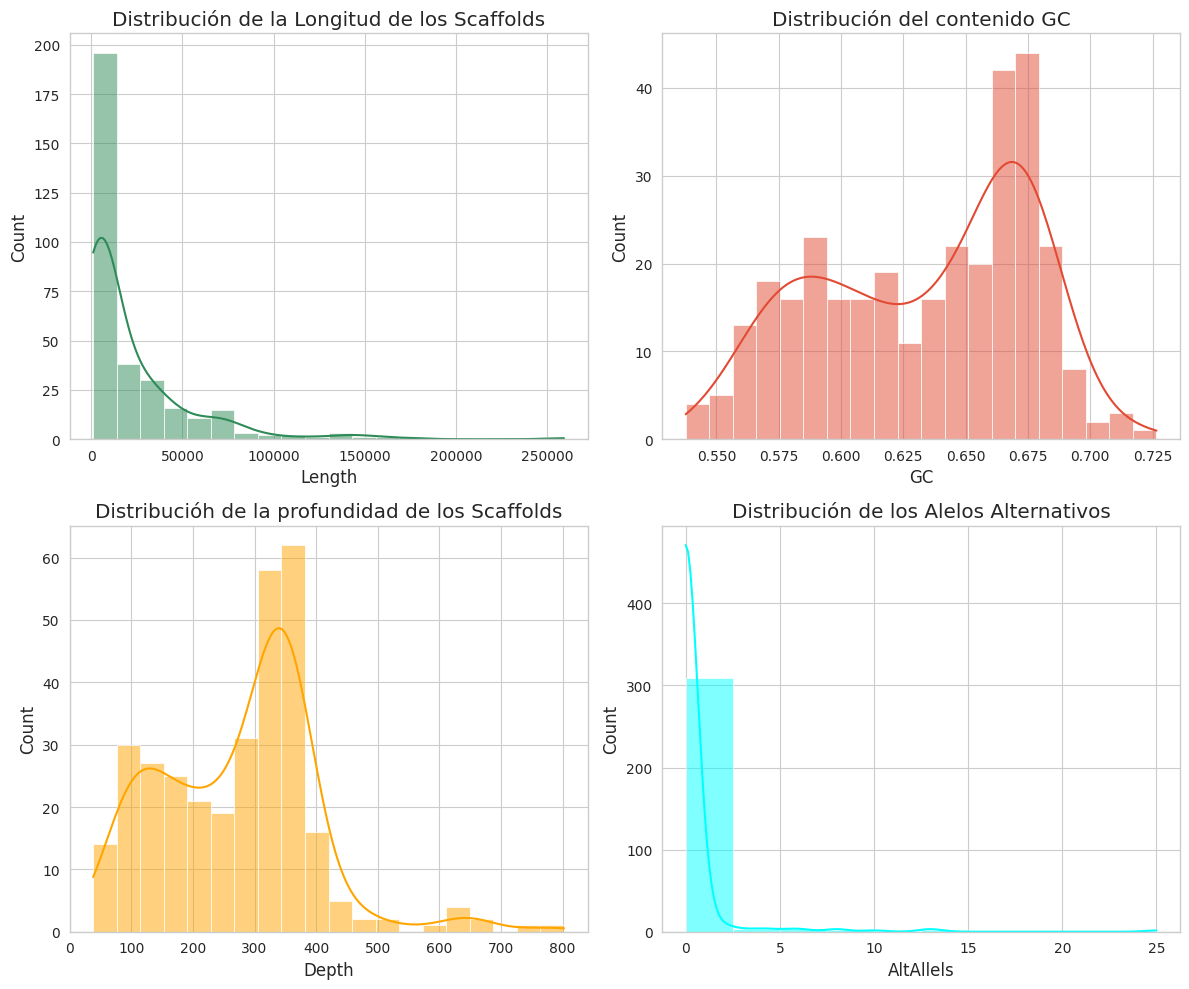

In [ ]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df["Length"], bins=20, kde=True, color="seagreen",ax=axes[0, 0])
axes[0, 0].set_title("Distribución de la Longitud de los Scaffolds")

sns.histplot(df["GC"], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribución del contenido GC")

sns.histplot(df["Depth"], bins=20, kde=True,color="orange", ax=axes[1, 0])
axes[1, 0].set_title("Distribucióh de la profundidad de los Scaffolds")

sns.histplot(df["AltAllels"], bins=10, kde=True, color="cyan", ax=axes[1, 1])
axes[1, 1].set_title("Distribución de los Alelos Alternativos")

plt.tight_layout()
plt.show()

## **4.1 Distribución GC**
 Prestar atención especial a la columna de GC

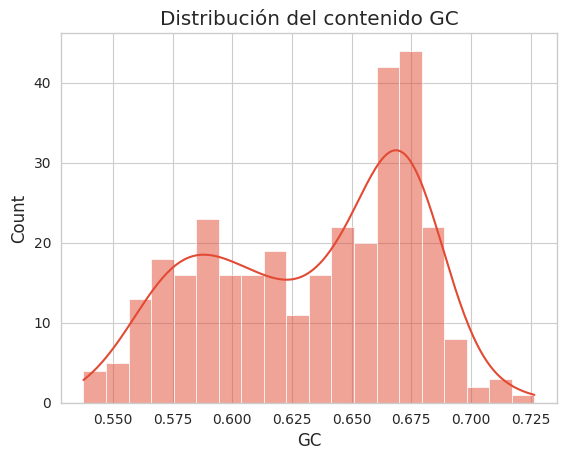

In [ ]:
sns.histplot(df["GC"], bins=20, kde=True)
plt.title("Distribución del contenido GC")
plt.show()

## **4.2 Gráfico de dispersión**

In [ ]:
df = df.sort_values(by='Length', ascending=False)
df['Scaffold group'] = np.repeat(range(1, 7), np.ceil(len(df) / 6))[:len(df)]

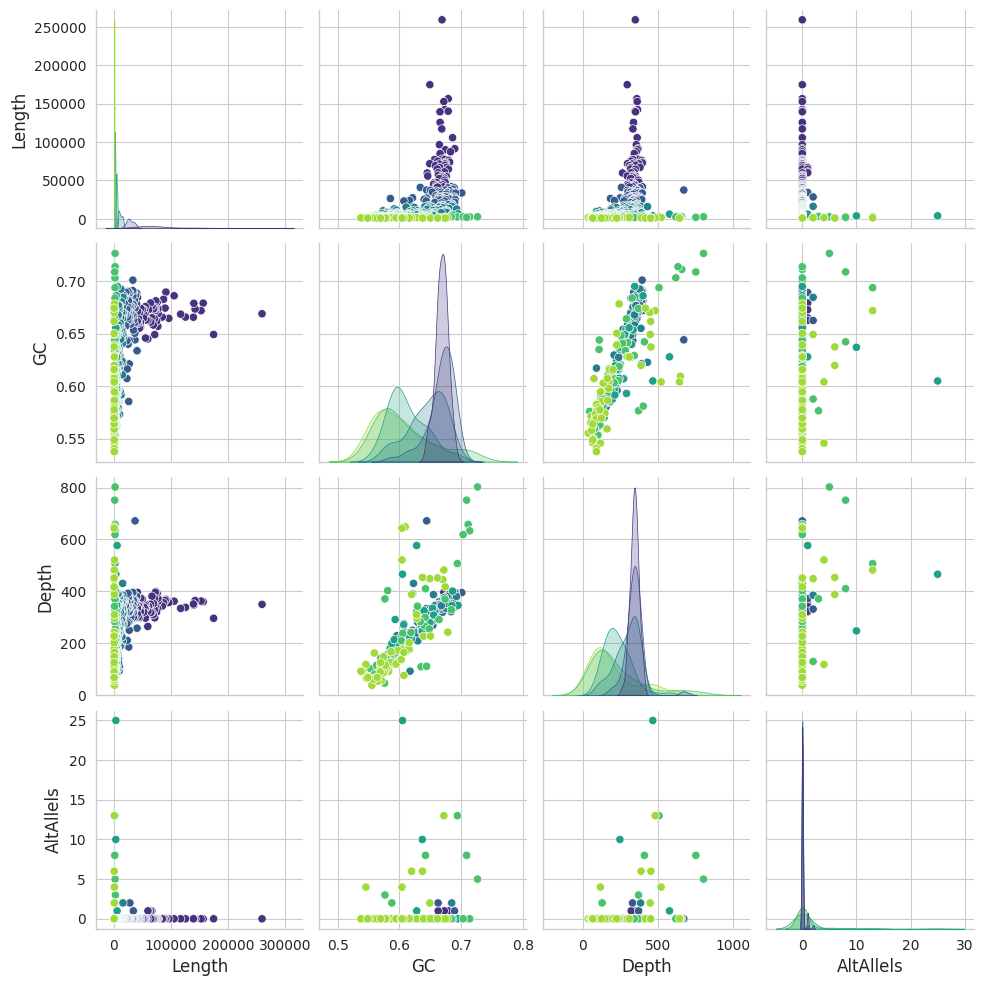

In [ ]:

custom_palette = sns.color_palette("viridis", as_cmap=False)

g = sns.pairplot(
    df,
    diag_kind="kde",
    vars=['Length', 'GC', 'Depth', 'AltAllels'],
    hue='Scaffold group',
    palette=custom_palette
)

g._legend.remove()
plt.show()

## **4.3 Distribución conjunta Length y Depth**

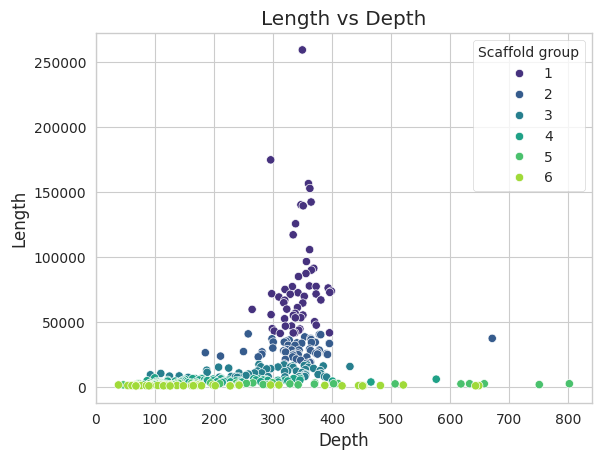

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Depth', y='Length', data=df, hue = 'Scaffold group', palette=custom_palette)
plt.xlabel('Depth')
plt.ylabel('Length')
plt.title('Length vs Depth')
plt.show()

## **4.4 Alelos alternativos totales**

In [ ]:
alelos_alternativos_totales = df['AltAllels'].sum()
print("Total de alelos alternos:", alelos_alternativos_totales)

Total de alelos alternos: 119


# **5. Función para preprocesamiento y visualización**

In [3]:
def process_genomic_data(csv_file):
    """
    Carga un archivo CSV, filtra los datos, elimina valores atípicos y genera visualizaciones.

    Parámetros:
        csv_file (str): Ruta del archivo CSV.

    Retorna:
        pd.DataFrame: DataFrame procesado.
    """
    # Configurar estilo de gráficos
    plt.style.use('ggplot')
    sns.set_style("whitegrid")

    # Cargar datos
    df = pd.read_csv(csv_file, delimiter="\t")

    # Filtrar por longitud mínima
    df = df[df['Length'] >= 1000]

    # Eliminar valores atípicos en 'Depth'
    umbral = df['Depth'].mean() + df['Depth'].std() * 3
    df = df[df['Depth'] <= umbral]

    # Graficar distribuciones
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    sns.histplot(df["Length"], bins=20, kde=True, color="seagreen", ax=axes[0, 0])
    axes[0, 0].set_title("Distribución de la Longitud de los Scaffolds")

    sns.histplot(df["GC"], bins=20, kde=True, ax=axes[0, 1])
    axes[0, 1].set_title("Distribución del contenido GC")

    sns.histplot(df["Depth"], bins=20, kde=True, color="orange", ax=axes[1, 0])
    axes[1, 0].set_title("Distribución de la Profundidad de los Scaffolds")

    sns.histplot(df["AltAllels"], bins=10, kde=True, color="cyan", ax=axes[1, 1])
    axes[1, 1].set_title("Distribución de los Alelos Alternativos")

    plt.tight_layout()
    plt.show()

    # Graficar pairplot
    df = df.sort_values(by='Length', ascending=False)
    df['Scaffold group'] = np.repeat(range(1, 7), np.ceil(len(df) / 6))[:len(df)]
    custom_palette = sns.color_palette("viridis", as_cmap=False)

    g = sns.pairplot(
        df,
        diag_kind="kde",
        vars=['Length', 'GC', 'Depth', 'AltAllels'],
        hue='Scaffold group',
        palette=custom_palette
    )

    g._legend.remove()
    plt.show()

    # Graficar Length vs Depth
    sns.scatterplot(x='Depth', y='Length', data=df, hue = 'Scaffold group', palette=custom_palette)
    plt.xlabel('Depth')
    plt.ylabel('Length')
    plt.title('Length vs Depth')
    plt.show()

    # Calcular el total de AltAllels
    total_altallels = df["AltAllels"].sum()
    print(f"Total de Alelos Alternativos: {total_altallels}")

    return df


# **6. Análisis con datos preprocesados para los primeros 5 archivos**

Procesando archivo LengthDepth_1.csv


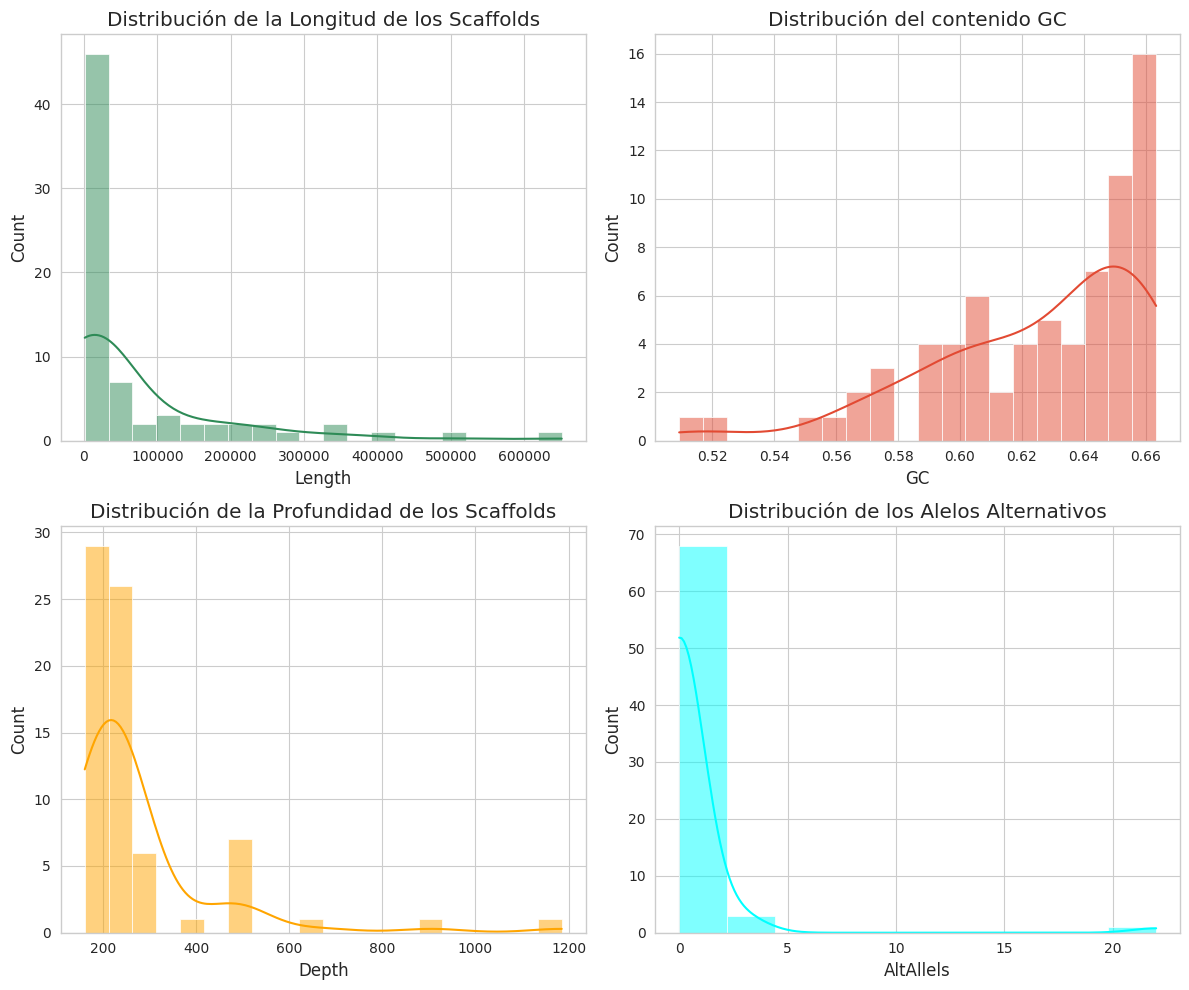

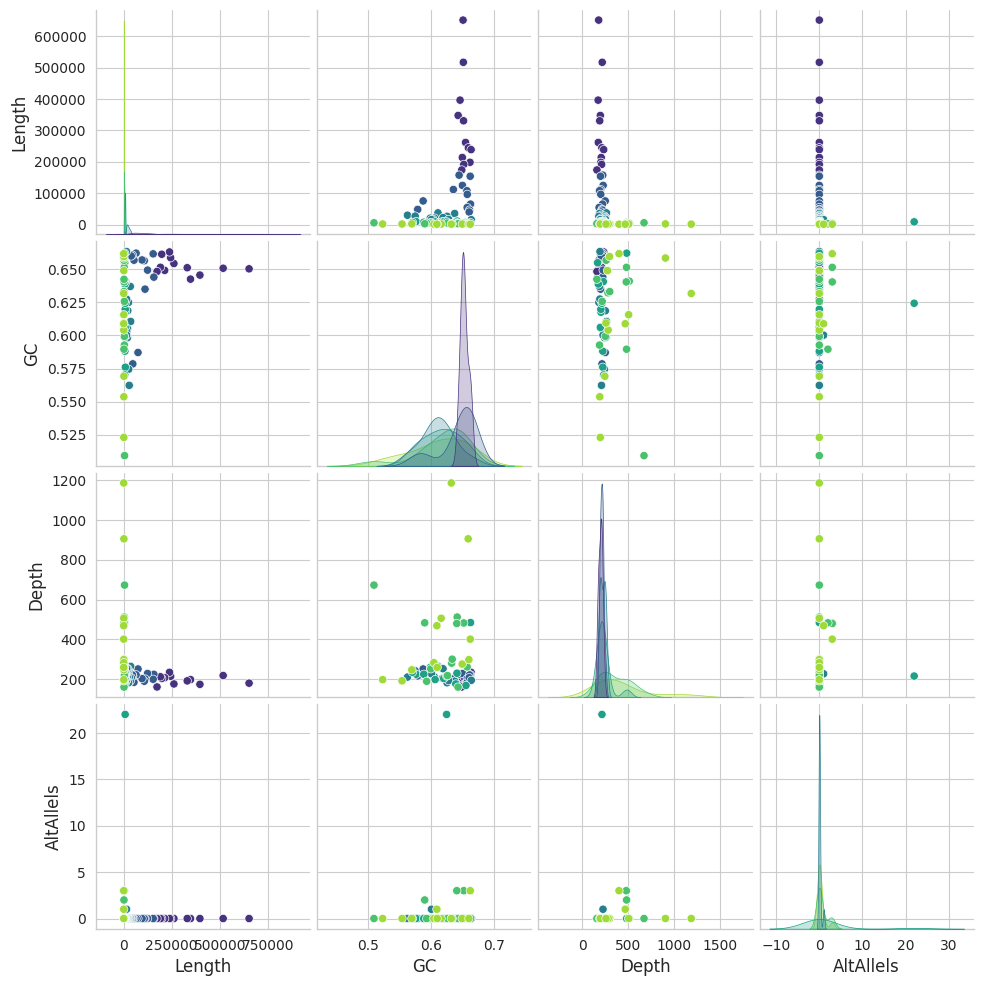

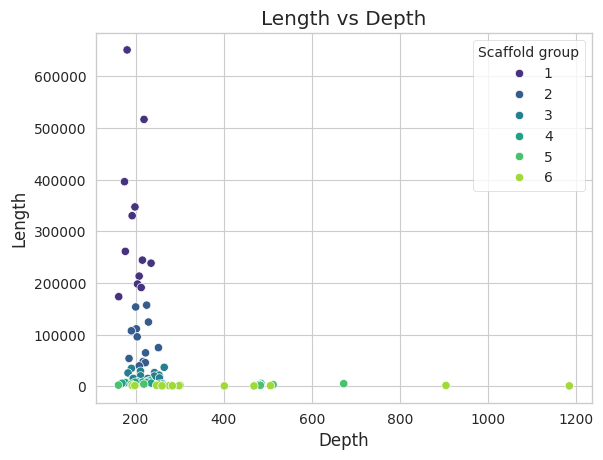

Total de Alelos Alternativos: 35

Procesando archivo LengthDepth_2.csv


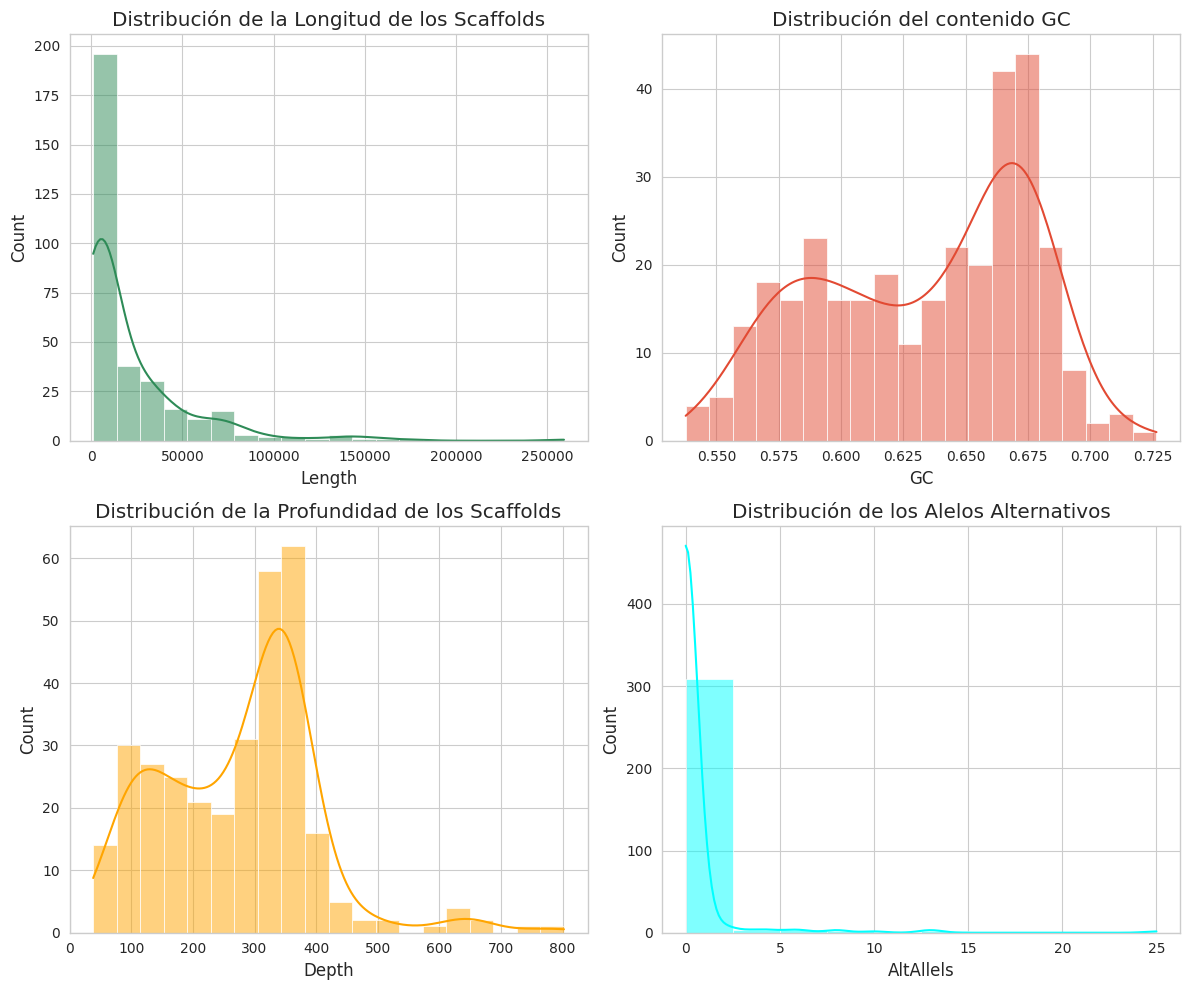

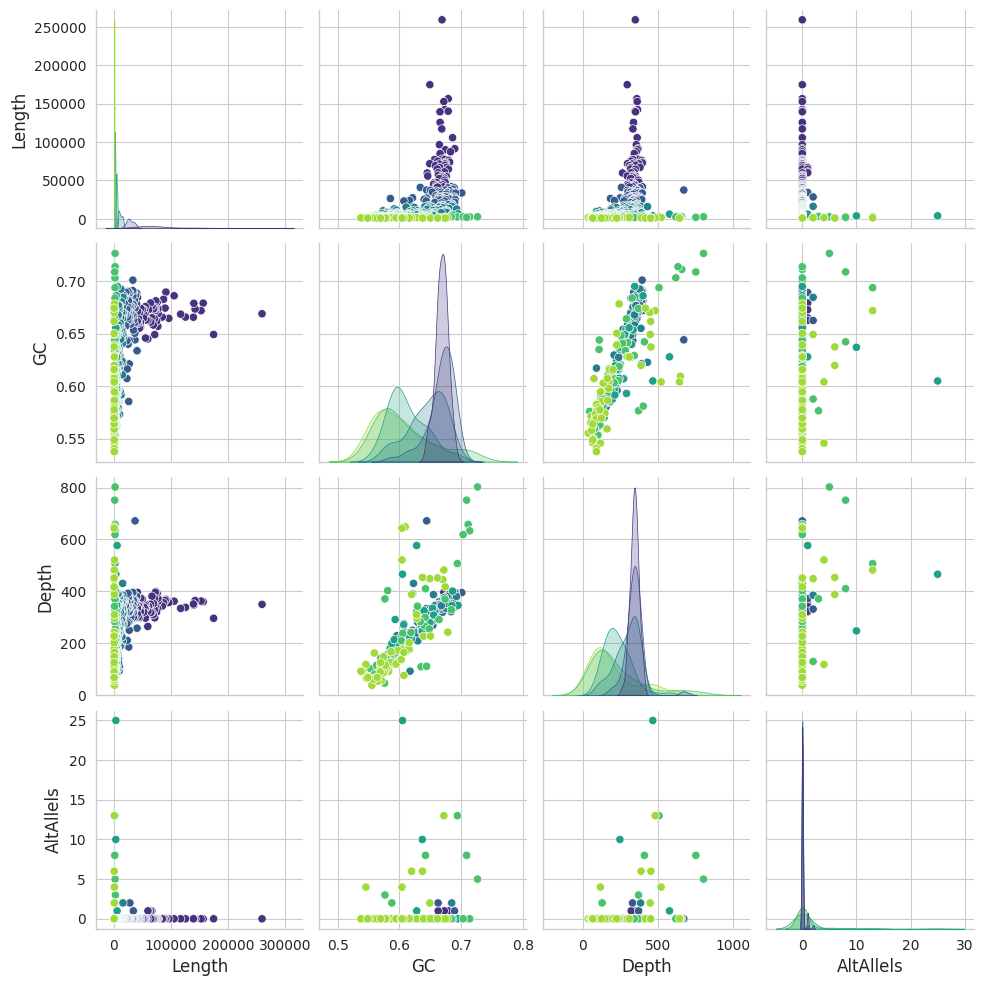

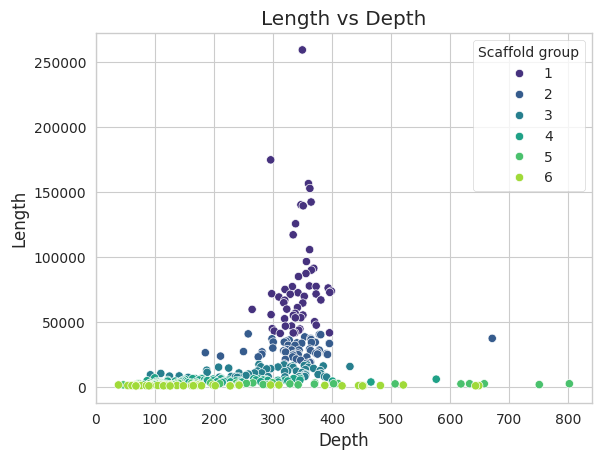

Total de Alelos Alternativos: 119

Procesando archivo LengthDepth_3.csv


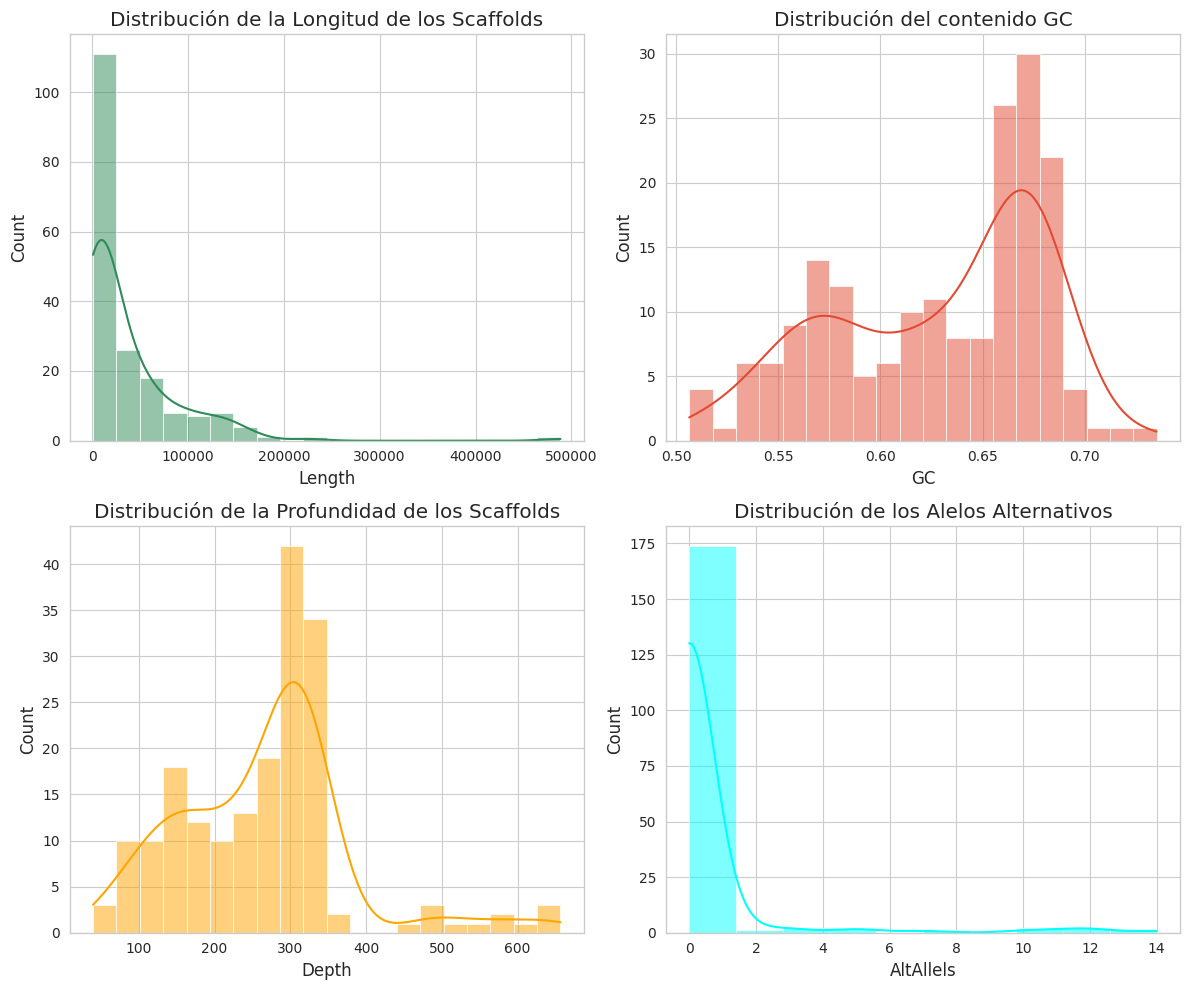

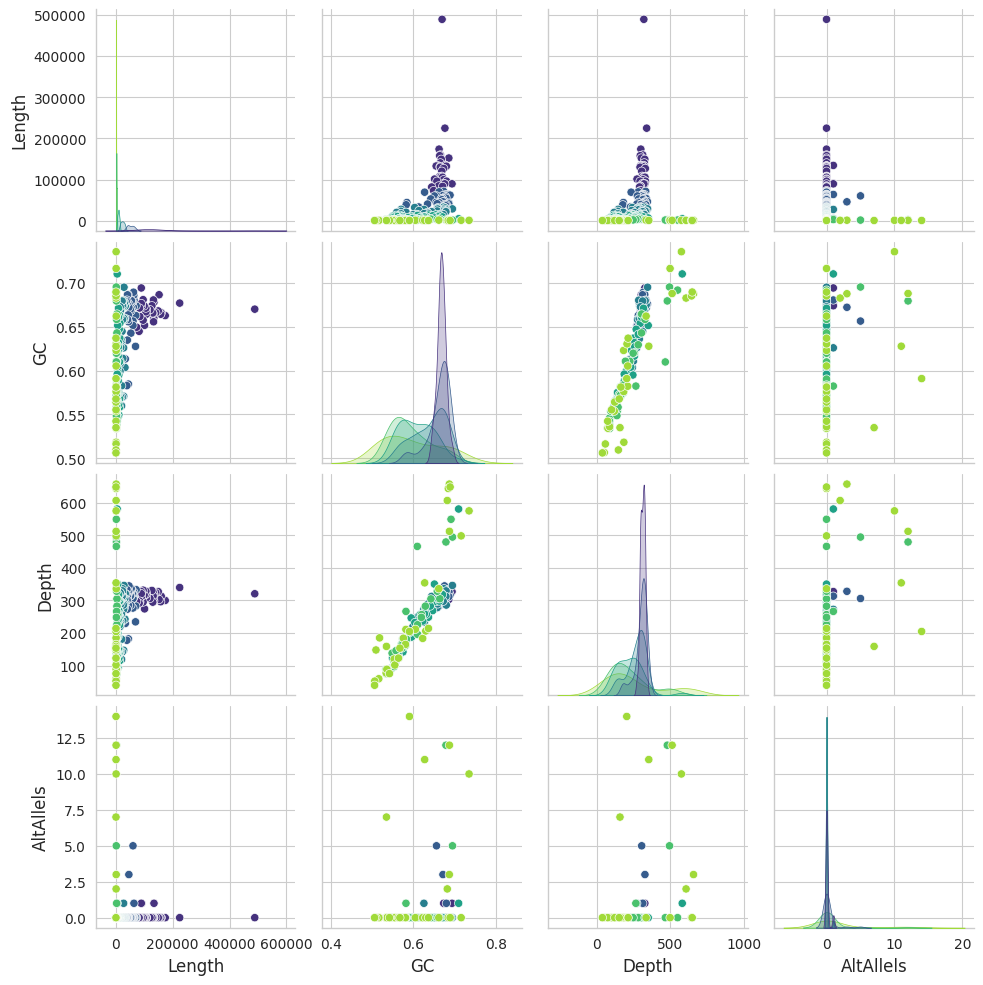

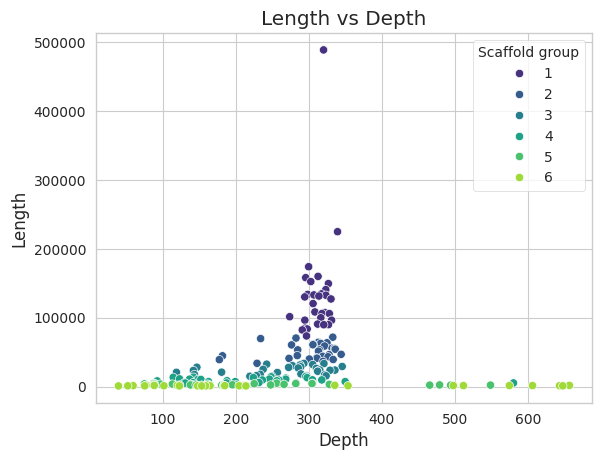

Total de Alelos Alternativos: 91

Procesando archivo LengthDepth_4.csv


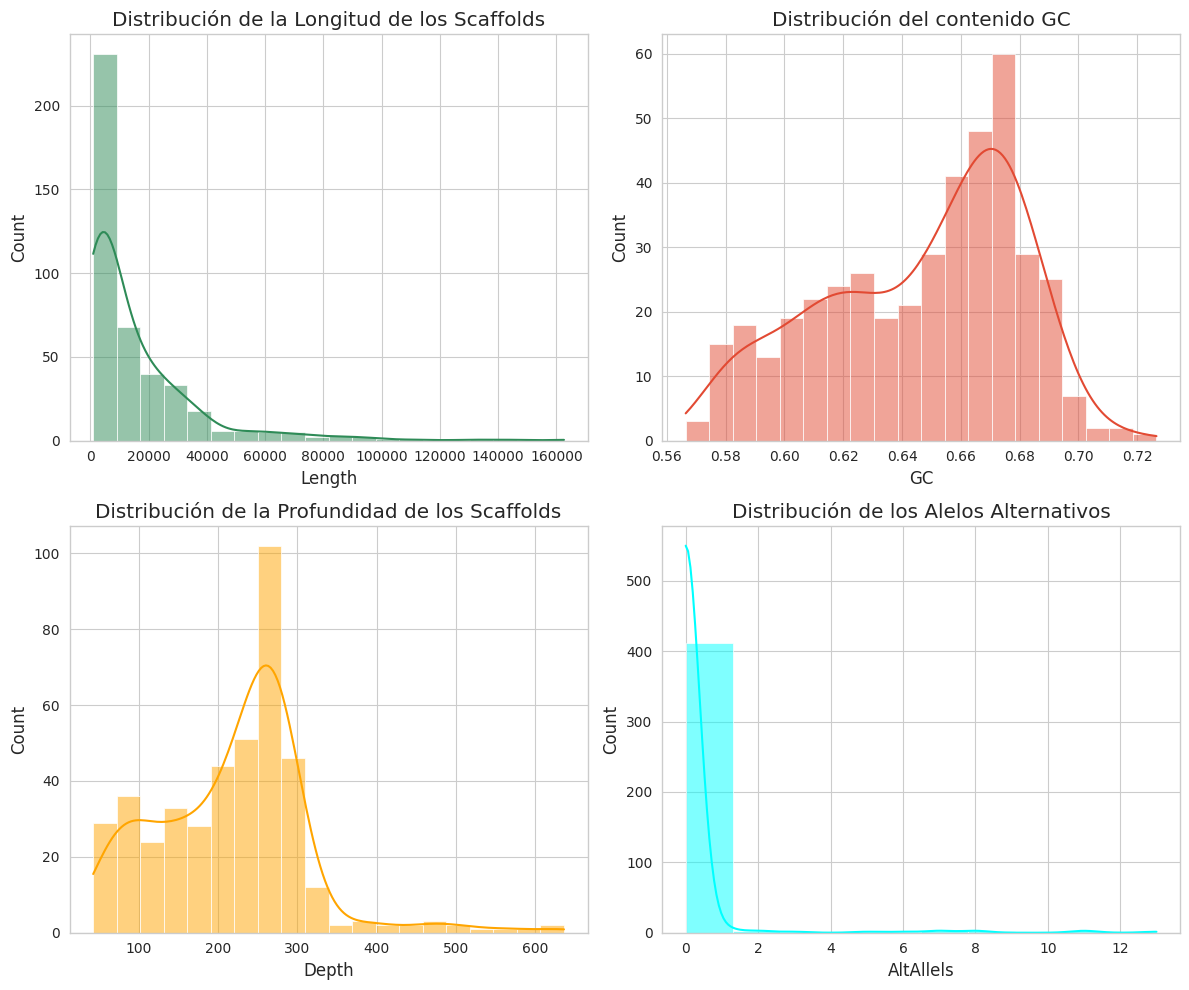

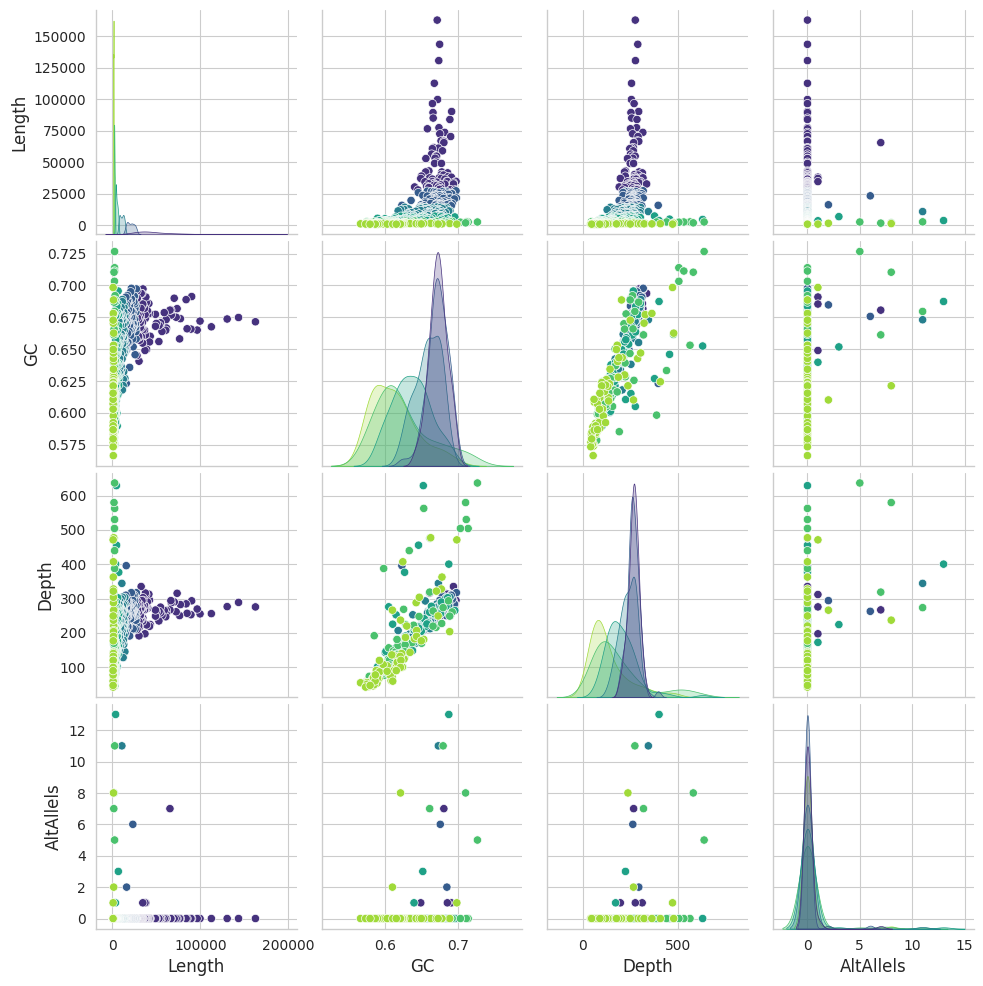

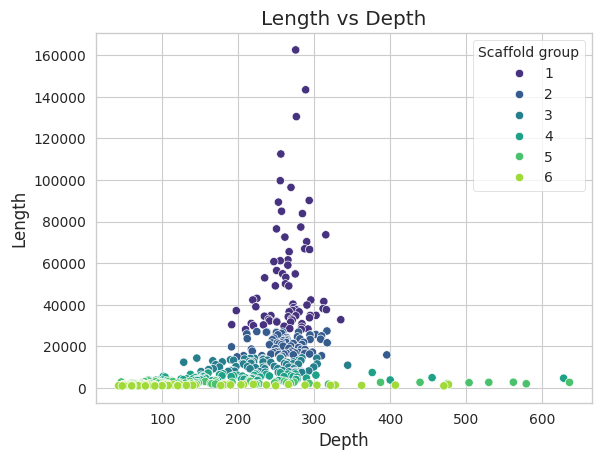

Total de Alelos Alternativos: 88

Procesando archivo LengthDepth_5.csv


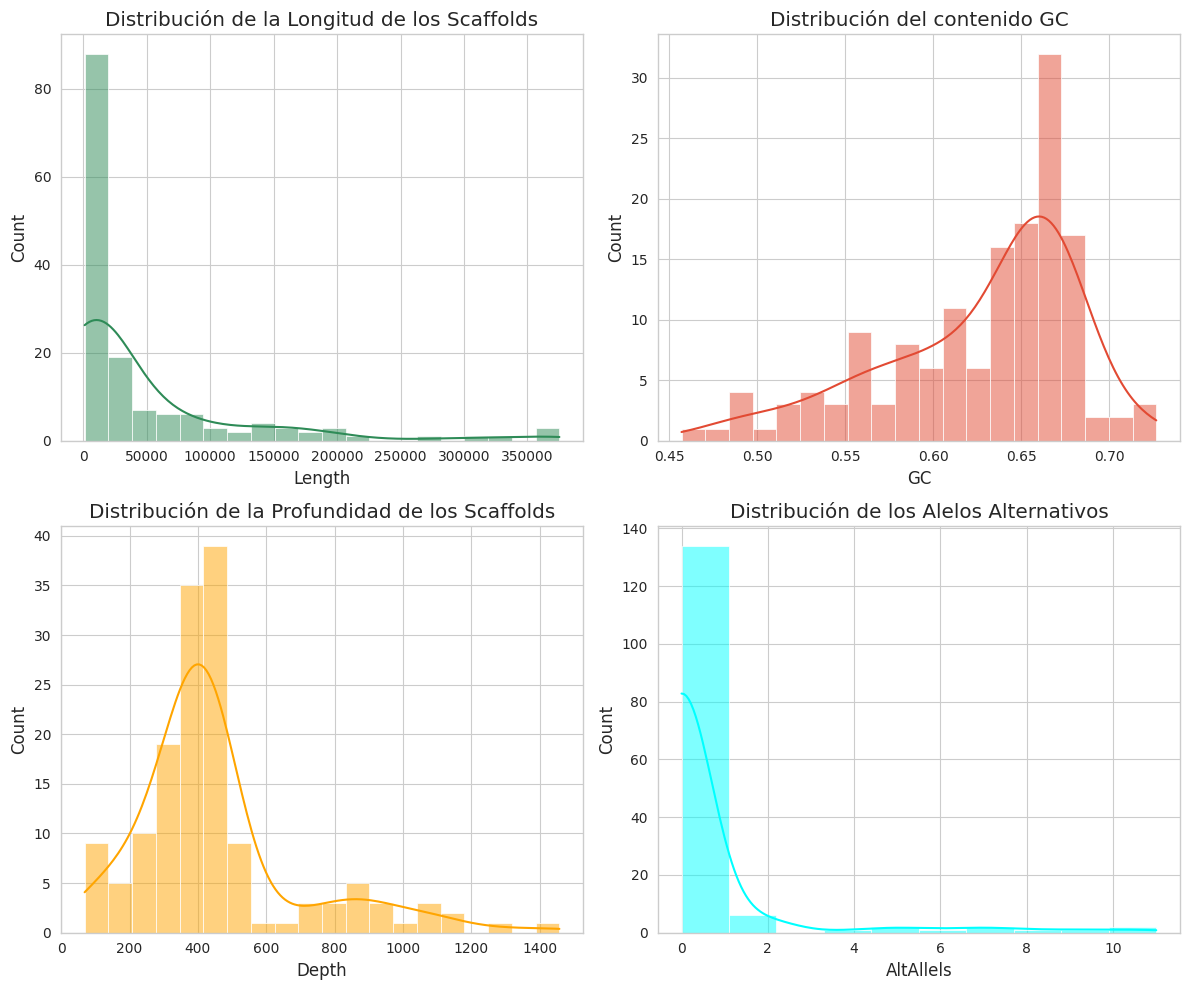

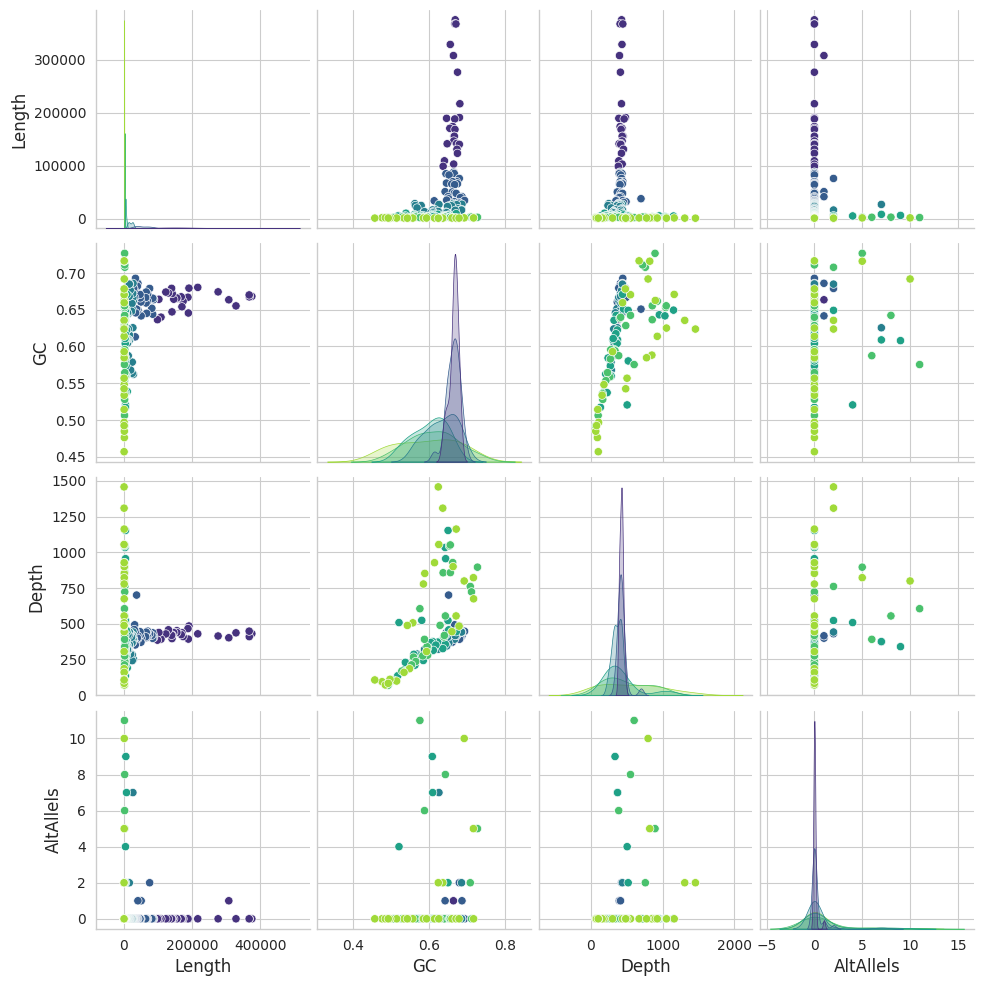

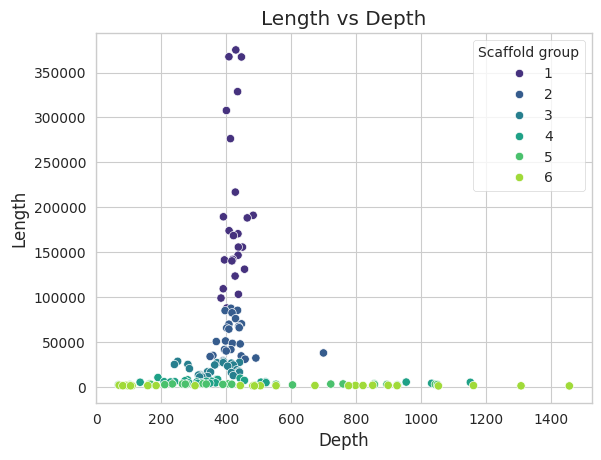

Total de Alelos Alternativos: 87

Procesando archivo LengthDepth_6.csv


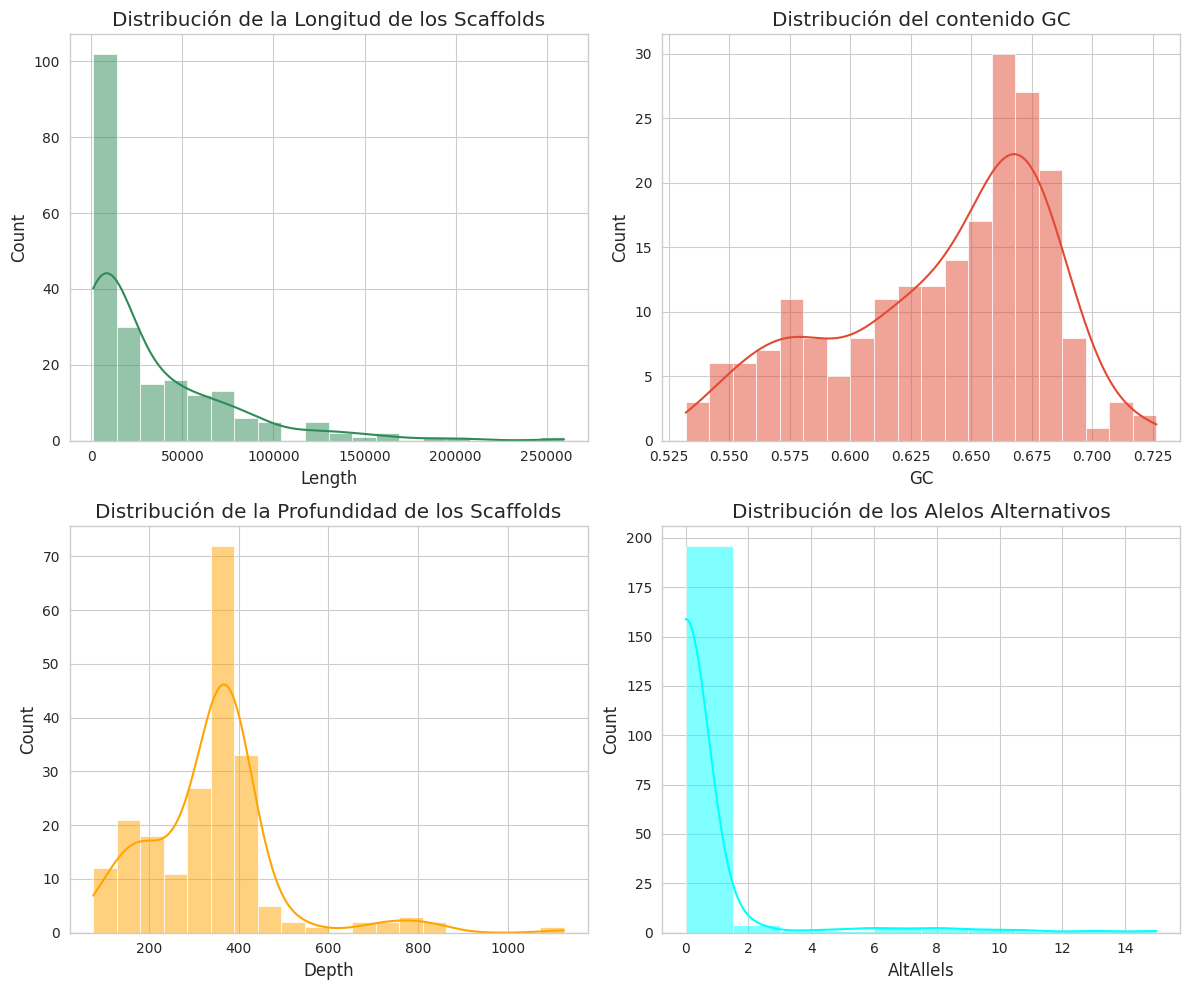

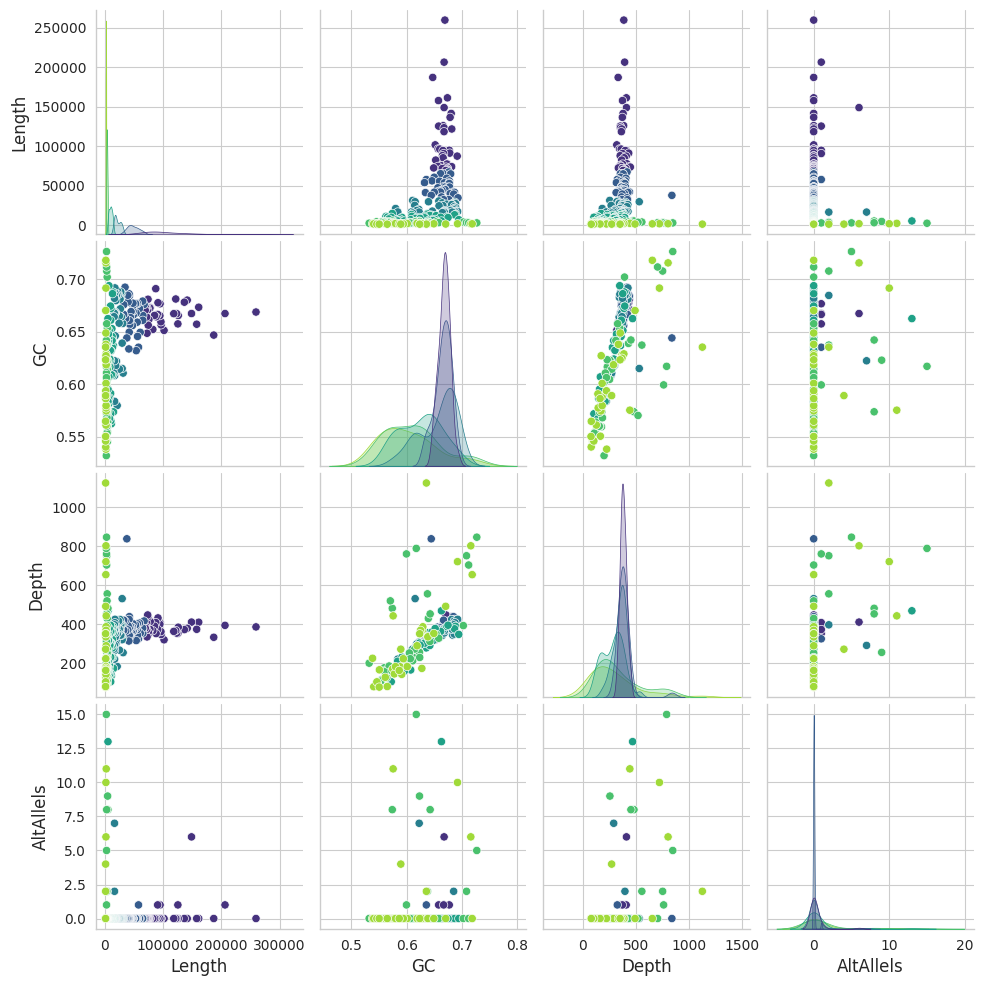

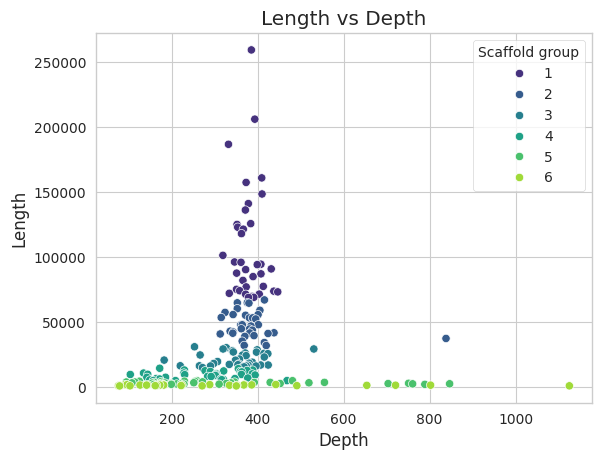

Total de Alelos Alternativos: 116

Procesando archivo LengthDepth_7.csv


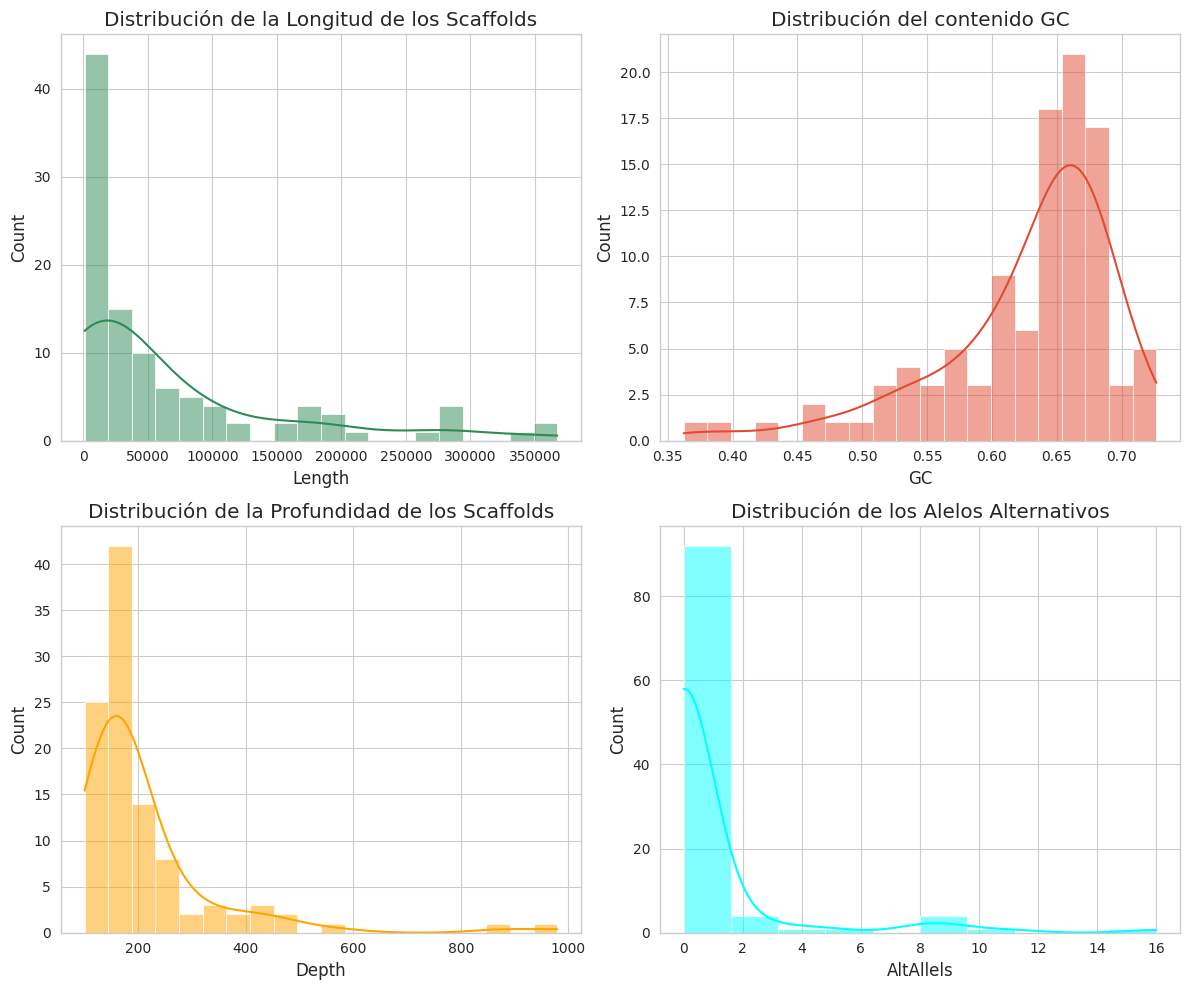

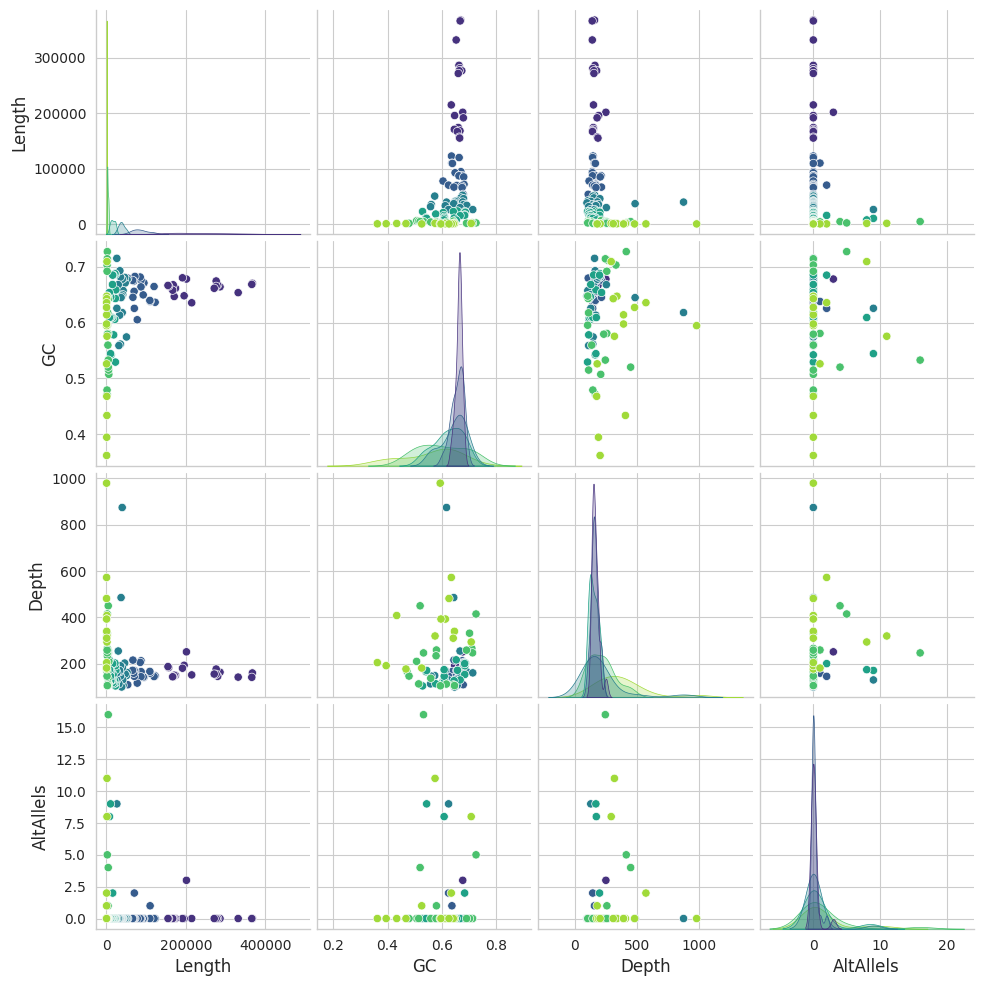

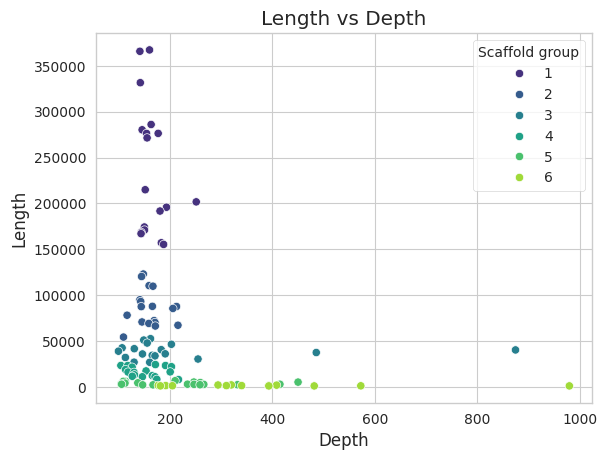

Total de Alelos Alternativos: 82



In [6]:
for i in range(1, 8):
  print(f"Procesando archivo LengthDepth_{i}.csv")
  process_genomic_data(f"/content/LengthDepth_{i}.csv")
  print()
